In [1]:
import matplotlib
#%matplotlib widget 

In [56]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [4]:
alliances = pd.read_csv('../data/alliance_ff.csv')

In [103]:
accounts = pd.read_csv('../data/accounts.csv')
accounts.created_time = pd.to_datetime(accounts.created_time)
accounts.last_active_date = pd.to_datetime(accounts.last_active_date)

In [5]:
alliance_membership = pd.read_csv('../data/alliance_membership.csv')
alliance_membership.timestamp = pd.to_datetime(alliance_membership.timestamp)

In [32]:
messages1 = pd.read_csv('../data/chat_messages_1_fixed.csv', on_bad_lines="skip")
messages2 = pd.read_csv('../data/chat_messages_2_fixed.csv', on_bad_lines="skip")
messages = pd.concat([messages1, messages2]).dropna()
messages['filterted'] = messages.filtered.astype(float)
messages.timestamp = pd.to_datetime(messages.timestamp)

/var/folders/2g/v44yvb1n6sdgnp5mwbh8_qgc0000gn/T/ipykernel_3741/3270853418.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  messages2 = pd.read_csv('../data/chat_messages_2_fixed.csv', on_bad_lines="skip")


In [18]:
alliance_size = alliance_membership.groupby('alliance_id')['size'].mean()
alliance_size

alliance_id
00013d8d22a2f2ddf001c09fd56460ea653e0e56ebad8d986f53d44b99d67f6c     6.000000
0001a26df18f5c9a6899b640a8b1d94228627549ee986fbaca2cbd3df569161e    45.000000
00021e9498dc2a094aa70f2389a37d8e2151b8670503f19806b729d6be0ddbf4    46.000000
00037c4d84bb2402caa05f133a4d48375465eeeba40ff4378c40d6e038badc3d     4.000000
000aab7e4a072537e4e062c2af26153eab2e8c4f7dcab416a18359c0871cd694    35.500000
                                                                      ...    
fff985994aab163379ddab92c6092d47e4c9a30c80cd3e1b94c65ce7c8ccc32e    49.538462
fffde93d85e9adac9e59945e2ea6eea7cccfe7c11a9a88907417a3ad80336690    40.000000
fffeb97edeea83ccb2cdfc4fe06acf5d833fd873bcd3c26415ebc26ebb01cc2e    11.500000
fffede185fb4d7d0596af1bf2c294d7c8614e1b14e38157ea292b47a5e889a7d    49.500000
ffff6cf8af9265fc77f0e4a2f5ac31ce19a163d52721ae1af9b45ab26a35d0a5     8.500000
Name: size, Length: 33754, dtype: float64

## Mean Sentiments all Messages

<Axes: title={'center': 'Mean Sentiments'}>

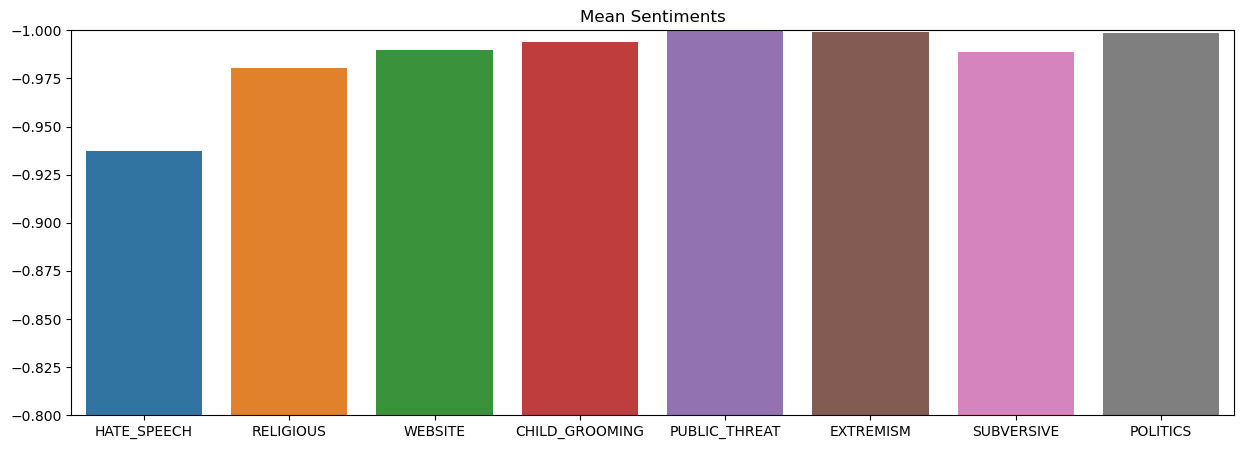

In [19]:
categories = messages[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].mean()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([-0.8, -1.0])
ax.set_title('Mean Sentiments')
sb.barplot(ax=ax, x=categories.index, y=categories)

## Over all chats distributions of different hate speech strength

<Axes: xlabel='HATE_SPEECH', ylabel='Count'>

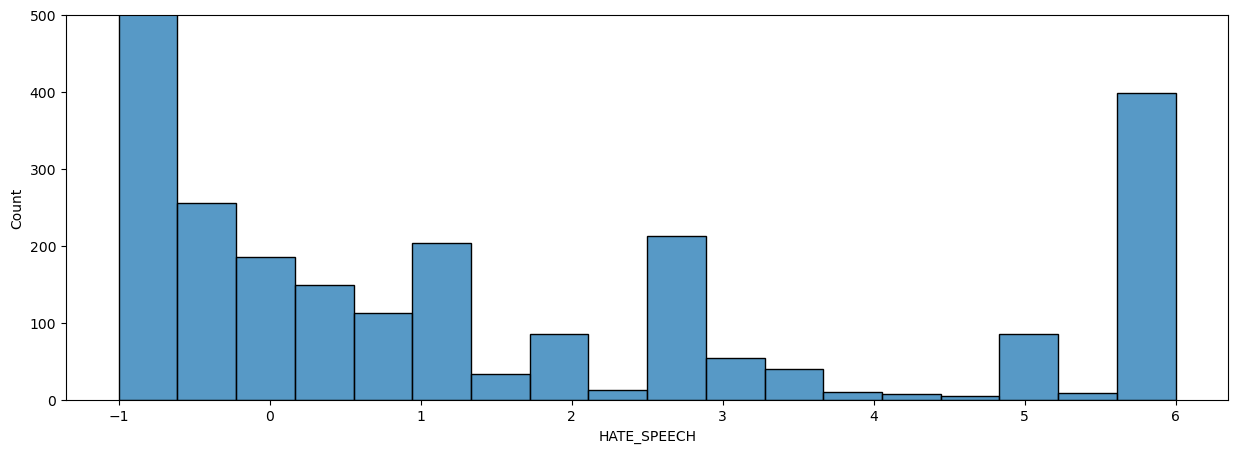

In [20]:
categories = messages[['alliance_id', 'HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']]
alliance_cats = categories.groupby('alliance_id')
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 500])
sb.histplot(alliance_cats['HATE_SPEECH'].mean())

## Hate speech strength vs. alliance size (far right might only be single hate speech message in a big group)

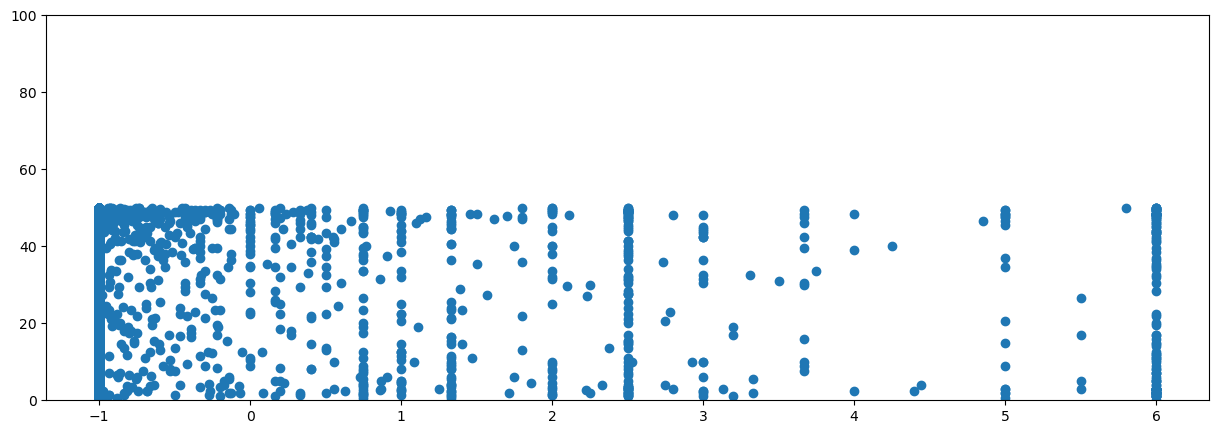

In [21]:
alliance_cats = categories.groupby('alliance_id')
hs_mean = alliance_cats['HATE_SPEECH'].mean()
#data['alliance_size'] = alliance_size
data = pd.DataFrame({'hs_mean':hs_mean, 'alliance_size':alliance_size})
data = data.dropna()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 100])
plt.scatter(data['hs_mean'], data['alliance_size'])

## Hate speech per alliance vs number of messages in this alliance 

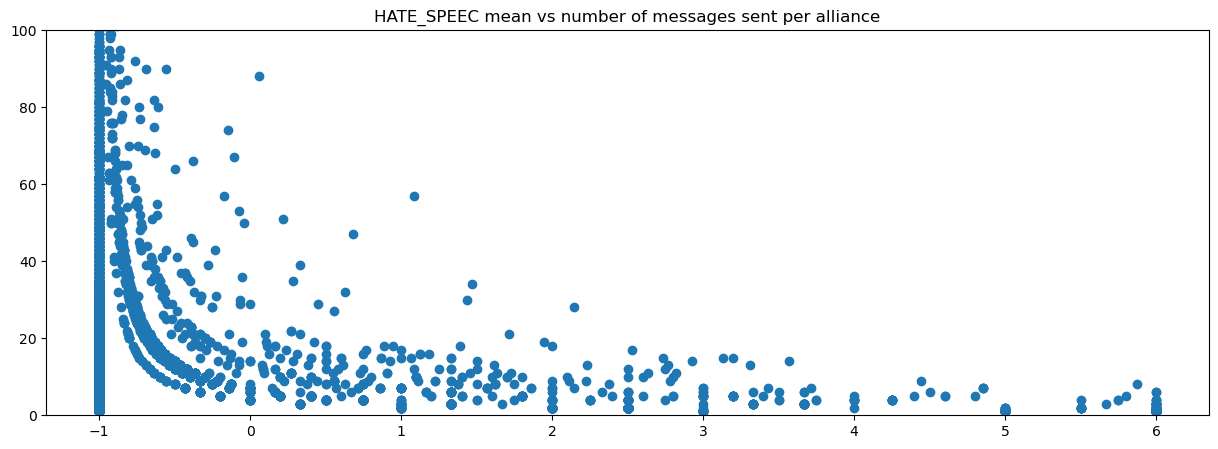

In [22]:
alliance_cats = categories.groupby('alliance_id')
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 100])
ax.set_title('HATE_SPEEC mean vs number of messages sent per alliance')
plt.scatter(alliance_cats['HATE_SPEECH'].mean(), alliance_cats['HATE_SPEECH'].count())

<Axes: xlabel='hs_mean', ylabel='num_messages'>

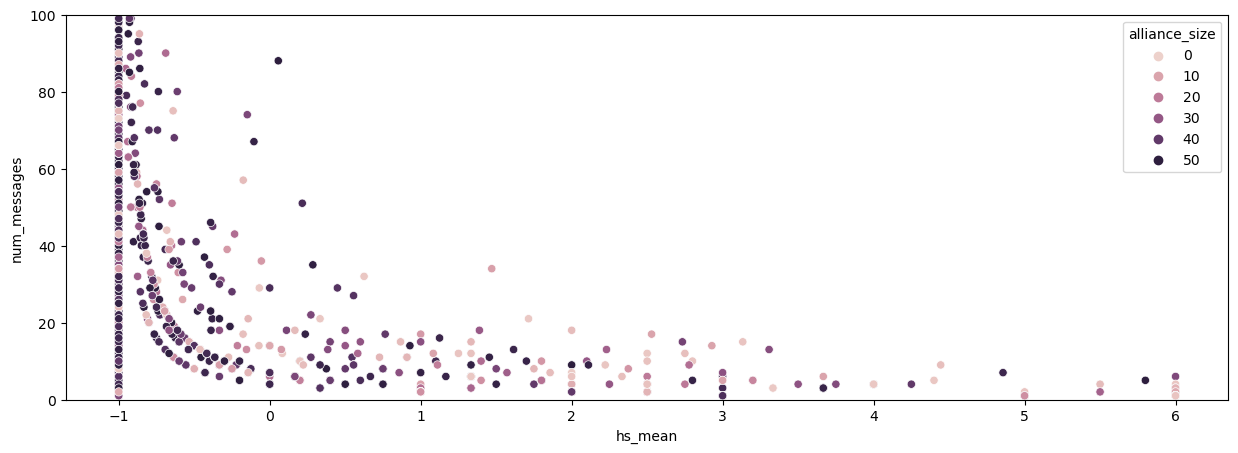

In [23]:
alliance_cats = categories.groupby('alliance_id')
data = pd.DataFrame({'hs_mean':alliance_cats['HATE_SPEECH'].mean(), 'num_messages':alliance_cats['HATE_SPEECH'].count(), 'alliance_size':alliance_size})
data = data.dropna()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0, 100])
sb.scatterplot(data=data,x='hs_mean', y='num_messages', hue='alliance_size', ax=ax)

In [24]:
data[(data.hs_mean >= 0) & (data.num_messages>=80) & (data.alliance_size>=50)]

,hs_mean,num_messages,alliance_size
alliance_id,,,
6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf3dc864c46aeeffac82,0.056818,88.0,50.0


In [25]:
cat_means = messages[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].mean()
cat_vars = messages[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].var()

In [26]:
grp = messages[messages.alliance_id=='23f31d22f6a302db33f9d35fc1a779bce1c0e628a9d87fca5d52d77b1e2e00c4']
grp[['HATE_SPEECH', 'RELIGIOUS', 'WEBSITE', 'CHILD_GROOMING', 'PUBLIC_THREAT', 'EXTREMISM', 'SUBVERSIVE', 'POLITICS']].mean()

HATE_SPEECH       1.388889
RELIGIOUS        -1.000000
WEBSITE          -1.000000
CHILD_GROOMING   -1.000000
PUBLIC_THREAT    -1.000000
EXTREMISM        -1.000000
SUBVERSIVE       -1.000000
POLITICS         -1.000000
dtype: float64

In [27]:
messages.filtered.astype(float).unique()

array([0., 1.])

In [28]:
alliance_membership[['timestamp','action']]

,timestamp,action
0,2023-03-01 00:00:28.344000+00:00,join
1,2023-03-01 00:02:07.065000+00:00,leave
2,2023-03-01 00:02:53.458000+00:00,join
3,2023-03-01 00:03:12.899000+00:00,join
4,2023-03-01 00:03:16.841000+00:00,leave
...,...,...
71762,2023-03-01 23:59:16.959000+00:00,leave
71763,2023-03-01 23:59:27.995000+00:00,kicked_out
71764,2023-03-01 23:59:42.435000+00:00,join
71765,2023-03-01 23:59:53.244000+00:00,leave


In [29]:
def print_alliance_messages(alliance_id):
    group_messages = messages[messages.alliance_id ==alliance_id]
    group_messages = group_messages.sort_values('timestamp')
    actions = alliance_membership[alliance_membership.alliance_id==alliance_id]
    actions = actions[['timestamp','action']]
    actions['print'] = actions['action'] 
    group_messages = group_messages[['timestamp','raw_message']]
    group_messages['print'] = group_messages['raw_message'] 
    joined = pd.concat([a,b], ignore_index=True)
    joined.sort_values('timestamp')['print']
    for i, msg in joined.iterrows():
        print(msg.print)

In [ ]:
Alliance: dflsjfkd
Members:
    today / insgesamt
    A: today: lvl 10, 10 hours/24h, 10$/, hate speech mean
    
Actions:
    A: Chat: fizzbuzz
    B: Action: Joined
    B: Chat: "Hello grills"
    A: Chat: whatup

In [41]:
messages.head()

,account_id,alliance_id,timestamp,date,raw_message,filtered_message,filtered,filtered_content,risk,filter_detected_language,...,HATE_SPEECH,RELIGIOUS,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS,filterted
0,e4a7ec3c30275728930f437813cce77addce5f0b1c00f1...,11cf0f6b70280de8e21157a87da895c0db0dcc34222386...,2023-03-01 19:18:26.449000+00:00,2023-03-01,depends on your overall goals. if its for bett...,depends on your overall goals. if its for bett...,0.0,[],2.0,en,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,54c5a9d1c8114757d4b35240efa897a22bc28895e819a3...,7c79793c8725b7394157f775f8e3f8bff2d173e93bede1...,2023-03-01 15:53:11.928000+00:00,2023-03-01,r,r,0.0,[],2.0,en,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,9eea942111cbd7b12091a1db7d6640d43f885692f2abf1...,75922cafc08f8d08b915906b90f5c75db2e1448be1c94d...,2023-03-01 15:52:35.611000+00:00,2023-03-01,All good,All good,0.0,[],1.0,en,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
3,89c31b38a52351c809235f2956a326e8da6e4418f9c931...,46c1e437614e72ae900ff9613495b976c09ec5a49befd6...,2023-03-01 13:07:35.370000+00:00,2023-03-01,RAHHHHHHHHHHHHHHHH,RAHHHHHHHHHHHHHHHH,0.0,[],1.0,en,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
4,e01056c4e33d374e5076478dd417d84e579bf91eea157d...,ea950b782e2e60729b1af6821f1a35591e33164f4cb908...,2023-03-01 22:52:31.489000+00:00,2023-03-01,2vs2?? o 1vs1??,2vs2?? o 1vs1??,0.0,[],2.0,en,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [143]:
from sklearn.preprocessing import OrdinalEncoder
import datetime as dt
def summarize_alliance(alliance_id):
    alliance_messages = messages[messages.alliance_id == alliance_id]
    alliance_messages['content'] = alliance_messages['raw_message']
    alliance_messages['type'] = "Chat|" + alliance_messages['account_id'].str[:3]
    actions = alliance_membership[alliance_membership.alliance_id==alliance_id]
    actions = actions[['timestamp','action','account_id']]
    actions['content'] = actions['action'] 
    actions['type'] = "Action|" + actions['account_id'].str[:3]
    
    enc = OrdinalEncoder()
    enc.fit(actions[["account_id"]])
    actions["account_id_enc"] = enc.transform(actions[["account_id"]])
    users_enc = actions["account_id_enc"].unique()
    users = actions["account_id"].unique()
    for user in users:
        #print(user)
        user_account = accounts[accounts["account_id"] == user]
        row = user_account.iloc[0]
        #print(row)
        risk_mean = messages[messages.account_id == user]["risk"].mean()
        print(f"User: {row.account_id[0:20]} | {round(row.revenue_today, 2)}$/{round(row.revenue, 2)}$ | {round(row.session_duration_today / 60 / 60, 2)}h / {round(row.session_duration / 60 / 60 ,2)}h | {row.level}lvl | since {(row.last_active_date - row.created_time).days} days | risk mean {round(risk_mean, 2)}")
        #print(user_account)
        
    # TODO: Print "Outlier" statistics for users in group
    joined = pd.concat([alliance_messages, actions]).sort_values("timestamp")
        
    return joined[["content", "type"]]
    # print(enc.categories_)
    
j = summarize_alliance('bc4c1c692638efa4a9ff139e82e87e9d79d247816350840197d3f0a7ef6d1ba7')

/var/folders/2g/v44yvb1n6sdgnp5mwbh8_qgc0000gn/T/ipykernel_3741/4239190721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alliance_messages['content'] = alliance_messages['raw_message']
/var/folders/2g/v44yvb1n6sdgnp5mwbh8_qgc0000gn/T/ipykernel_3741/4239190721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alliance_messages['type'] = "Chat|" + alliance_messages['account_id'].str[:3]


User: d7dc15915cc13b01ac48 | 0.0$/0.0$ | 1.91h / 59.63h | 17.0lvl | since 997 days | risk mean 1.0
User: 10ef4a53b96956019ec6 | 0.0$/0.0$ | 1.21h / 32.53h | 9.0lvl | since 546 days | risk mean 1.89
User: 1a0f7a1e0ae97be7372e | 0.0$/0.0$ | 1.22h / 6.23h | 16.0lvl | since 114 days | risk mean 2.0
User: f6c9e0b0ef73084db3d7 | 0.0$/37.92$ | 0.26h / 940.08h | 45.0lvl | since 1357 days | risk mean 1.67
User: 298094ea1e01d6133b13 | 0.0$/64.95$ | 0.49h / 716.68h | 36.0lvl | since 2438 days | risk mean 2.0
User: 94e99f948366fa6a8929 | 0.0$/0.0$ | 0.43h / 610.54h | 33.0lvl | since 1526 days | risk mean 2.33
User: 28f470269e124d2c52cb | 0.0$/0.0$ | 4.51h / 1921.95h | 35.0lvl | since 1405 days | risk mean 1.0
User: c441bdd504250209c99f | 0.0$/0.0$ | 0.97h / 553.73h | 34.0lvl | since 1076 days | risk mean 1.0
User: 18880bc10049c2aa5060 | 0.0$/0.0$ | 0.69h / 641.34h | 33.0lvl | since 1468 days | risk mean 1.4
User: b1f04de9b5728294cce2 | 0.0$/0.0$ | 0.53h / 337.98h | 29.0lvl | since 455 days | risk 

In [145]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(j[["type", "content"]])

              type               content
107     Action|d7d                 leave
27039   Action|191                  join
27040   Action|191                 leave
63202   Action|0fc                  join
11994     Chat|01a                   Yes
93003     Chat|01a                   Cap
80897     Chat|01a            A distance
4996      Chat|9dd              bahahaha
97083     Chat|220                    gg
21057   Action|c44                  join
2900    Action|d7d                  join
85062     Chat|9dd                  cool
31127     Chat|9dd                    wp
38730   Action|8b1                  join
3112    Action|10e                 leave
113940    Chat|8b1                 ok ok
10317     Chat|8b1                   m’y
65605   Action|8c6            kicked_out
169784    Chat|8b1                 80h19
38819   Action|8b1            kicked_out
126106    Chat|061   ma co full lag bruh
4081      Chat|fef                    Ah
38939   Action|8b1                  join
123759    Chat|2

In [46]:
messages[messages.alliance_id == 'a945f399de213cc578c6cd289563b8390c671c24aac8f14b3466a76ab796429b']

,account_id,alliance_id,timestamp,date,raw_message,filtered_message,filtered,filtered_content,risk,filter_detected_language,...,HATE_SPEECH,RELIGIOUS,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS,filterted


In [39]:
print_alliance_messages('a945f399de213cc578c6cd289563b8390c671c24aac8f14b3466a76ab796429b')

NameError: name 'a' is not defined

In [126]:
print_alliance_messages('bc4c1c692638efa4a9ff139e82e87e9d79d247816350840197d3f0a7ef6d1ba7')

join
it will come
is it hard to raise chickens
eggt
never had one like to try
I want a ostrich egg
I've tried a lot of wild game but never a quail egg or ostrich egg
I'm with you sparty. I'll stay here until it becomes more chore than fun. it's not that much extra loot
Caboom sorry work issues came up
Chickens or eggs. Never go to Tractor Supply co for eggs or chickens
what’s the promise egg?
you deserve it buddy
a lot of coon and opossum
really can't say coon
raccoon
Coons
yep
Koons and possums
I'm a cracker
Koons and possums
I can say that though
They mute koon when used in a sentence
so stupid
Spooks
Spook
Spooky
spook
spook
It wont let me say it
coon
nope
Chink
honky
can't say that either
honk
Crack
Meth
it's so damn stupid
thank you so much for the promo big egg
I feel like someone should update our clan description to look more professional
but that's all
trophies stay till after war
free range chickens I'd worry about, hawks and eagles
i won’t do anything with the clan unless yo

In [118]:
joined = pd.concat([a,b], ignore_index=True)
joined.sort_values('timestamp')['print']

1                                          it will come
2                          is it hard to raise chickens
3                                                  eggt
4                             never had one like to try
5                                  I want a ostrich egg
                            ...                        
85    They are forecasting hail and possible tornado...
86                           wow didn’t know about that
0                                                  join
87                                            Hey Guys…
88                       Was happening, happened to us.
Name: print, Length: 89, dtype: object

In [76]:
alliance_membership[alliance_membership.alliance_id=='6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf3dc864c46aeeffac82']

,account_id,alliance_id,timestamp,date,action,size,max_size
26339,f9c5da57307b09928626cf51e642f045457a206fd9b6b0...,6dad00c20f6df7cbeeb5b884de21fb9cb7d5f80a2607bf...,20230301T224922.631Z,2023-03-01,join,50,50


In [47]:
actions = alliance_membership.groupby('alliance_id')['action'].count()
actions.sort_values(ascending=False).iloc[:20]

alliance_id
bc4c1c692638efa4a9ff139e82e87e9d79d247816350840197d3f0a7ef6d1ba7    174
588766134ff8471a581afd8fbdb981305891f170e55572b39a72e2c265287375    163
8e597100933e8b5a1390072dab51abcad340c9e7a2bc2dfa5e52de9fd2869fb6    103
ea7c21c4393133450f5f0613acf9a03bdacb679da45f21bb6b42e0d60e406af9     96
b6b227ab762e8ff6fa6a46de73d5f387f4c1d00f423808e801b57af1dbe0145c     90
23c418cc661bbdb8df3b67e20862a6f8e32bf22ac56be0239a8cf2495c689da9     81
6026b8f51800cd45d44e63d31a7fa2fb455ba6c0991c3913597040f9e0d18b64     76
1283c5eac60d3a9c2c888742e228531f0884a9411dc40eaeda4f66057d9b89fa     75
46df7090c8d12ea2e9b9445803fccdbb51cfacdd5d25238ce919441fed095399     72
f129458bff0613e5624147ffb76b0923856739fa1c0844a5718dae6a8eeb1ee5     71
eb10a18469110f2fd1db3e5c51b6ef4ee834938c7337d957425cf522d1dd17dc     66
a43c6419d438a1e2a4b5cd41b1fc34ac11df2bcc6c1ee4b3b483f0f768c80fbe     64
92960e5904d7883889ed0f80efa4668fb01ca39c2f69b8f4a6ca56791919d4dd     64
37c20a13b5bc7e658716a3d6e272cca0ee5b6492a7672e90883e

In [ ]:
allia

In [96]:
messages[messages.alliance_id=='8eddfad80fdd312e51c2b5aadd6e8b285e66772bead431ce9faae84895b91a7a']['risk'].mean()

1.5833333333333333

In [98]:
print_alliance_messages('1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb274dc79c8384df8be5')

ok ok
pinky pinky
gg gg
gg gg
You are adopted You are adopted
hi hi


In [99]:
alliance_membership[alliance_membership.alliance_id=='1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb274dc79c8384df8be5']

,account_id,alliance_id,timestamp,date,action,size,max_size
5121,d0c1fc43e0974b33bef4e8c3c120af255255f241df688b...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T155626.253Z,2023-03-01,join,46,50
24274,ec5eecda57d0436aa170337e548e73f4b3b40b0141a1b4...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T180014.926Z,2023-03-01,join,50,50
24350,ec5eecda57d0436aa170337e548e73f4b3b40b0141a1b4...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T181123.368Z,2023-03-01,leave,49,50
24511,ec5eecda57d0436aa170337e548e73f4b3b40b0141a1b4...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T183507.569Z,2023-03-01,join,50,50
24942,ec5eecda57d0436aa170337e548e73f4b3b40b0141a1b4...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T192728.701Z,2023-03-01,leave,49,50
38841,c8902fdda94b97f82ef1d2484452307f5c017fa7249b4a...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T110852.736Z,2023-03-01,join,45,50
39008,c8902fdda94b97f82ef1d2484452307f5c017fa7249b4a...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T114517.572Z,2023-03-01,leave,44,50
39341,c8902fdda94b97f82ef1d2484452307f5c017fa7249b4a...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T123610.078Z,2023-03-01,join,45,50
39410,c8902fdda94b97f82ef1d2484452307f5c017fa7249b4a...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T124159.059Z,2023-03-01,leave,44,50
39905,c8902fdda94b97f82ef1d2484452307f5c017fa7249b4a...,1c2990ada9d45cd65c09eb3e66de7c5ea67264d684abeb...,20230301T135646.434Z,2023-03-01,join,46,50


In [27]:
messages[messages.alliance_id == '5bb44180ae3a20f38b38d07a3b987c3e55945f6c2d501338e53ff577221e8329'].account_id.unique()

array(['98149bd911daf266d0ae029599c78a4f885bf30f125f31658d129e9063b27e03',
       'fd4382f5c4795425e6e98a60de70682085ef6104bcb291948153f3f4ff745140',
       '4d3a166b3cf8c8b052803517a0e64e557d18a867ffde3cd4b90ff292f6d808b1',
       '468da748400dfabeaec9ddb3d22db45a4f6d6c24cdffb9d842e8229146b42c69',
       '5f8f06982f01b39f5cf269cf40f01d5fa14a24d4124f91bc9f44099056c45468'],
      dtype=object)

In [34]:
nazi_accounts = ['98149bd911daf266d0ae029599c78a4f885bf30f125f31658d129e9063b27e03',
       'fd4382f5c4795425e6e98a60de70682085ef6104bcb291948153f3f4ff745140',
       '4d3a166b3cf8c8b052803517a0e64e557d18a867ffde3cd4b90ff292f6d808b1',
       '468da748400dfabeaec9ddb3d22db45a4f6d6c24cdffb9d842e8229146b42c69',
       '5f8f06982f01b39f5cf269cf40f01d5fa14a24d4124f91bc9f44099056c45468']

messages[messages.account_id.isin(nazi_accounts)]["alliance_id"].unique()

array(['5bb44180ae3a20f38b38d07a3b987c3e55945f6c2d501338e53ff577221e8329'],
      dtype=object)

In [63]:
risky = messages[messages.risk > 3]
risky_groups = risky.groupby('alliance_id').count()
risky_groups[risky_groups.account_id > 20]

,account_id,timestamp,date,raw_message,filtered_message,filtered,filtered_content,risk,filter_detected_language,is_family_friendly,...,FRAUD,HATE_SPEECH,RELIGIOUS,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS
alliance_id,,,,,,,,,,,,,,,,,,,,,
056e4a1ee5f5b2f35ad3d7996269980c2026330a77822ca01495a2b895b83f87,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
15a1b0e15ebdfeb81100492b11d57b22864d8c33519dec5b50b33f8986546824,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
2b7a01151f9c1901ee3cd4594f1fe487eccc14b0b524f0481a8e810a33a30f54,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
33ee5412c3d0ffe911e465784aa88d4bdb44057ed093f3ed3b1d43b7d4b854e4,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
37ebcdbc513d0a055cf94c422015a7e0b057d79d57734cf34ad79f2d12df0bb3,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
38f06fe05b0d3585c82ce43331dc47c4b927fb9493249d1f879e9b2e5b0f5011,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
404093e4de5709f16f8096aa237f9f7f2106c76e198f1d18729774d1e3e5db54,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
43ac0e23569c376819e2d1bc2f79c60d9e0d3532a0152d0fc50115e97a1b7532,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
5735955f372580a1d42141fa110c95225b67fdf423e5ec8a74543c37dd8b17d4,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


In [61]:
risky_groups

,account_id,timestamp,date,raw_message,filtered_message,filtered,filtered_content,risk,filter_detected_language,is_family_friendly,...,FRAUD,HATE_SPEECH,RELIGIOUS,WEBSITE,CHILD_GROOMING,PUBLIC_THREAT,EXTREMISM,SUBVERSIVE,SENTIMENT,POLITICS
alliance_id,,,,,,,,,,,,,,,,,,,,,
00000709d10b0d23ece5003a93f0ccef17561d8834553cbbbf631058d46975a7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
00006728d51965d89166234abf9a67f824836777587b82f4c98791f417a52e83,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000ad794664e4a07fcaf0a2e43f38e371e8757c805833a1ff23fe51dd232b4e7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000dbb0fe0843e50b13030b5c5045e9d582012cf2f0962904f74cc334379a023,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000f62f0f7c1c2802701586e2ce4def5cae0aba253a51f10eb43eea221a25065,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe46f9a09dc1aacc9624bd61710abc5c77cf02588b6f78396091b40dfcde064,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ffe7138874b49afab24b006fa15147e742f9dc2e83faed961ba663417e6ebca6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fff63fd1634dd7db5744b6958c0055ee1fad8a49722b3273c749ef90b948e476,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [27]:
messages1.iloc[5605].raw_message

'"oops,forgot to say ""important"""'

In [11]:
alliance_membership.groupby('account_id').count()

,alliance_id,timestamp,date,action,size,max_size
account_id,,,,,,
0000e7f280a1a273174240513410d3538d0ad2ad77d7794066b0cb8cf1e5cd97,4,4,4,4,4,4
0002d70ca9f02320c4b873884a8cf78f164ea04741c7556687044277509a12a1,2,2,2,2,2,2
000622077dd8fb866647e4c02011454ce350698afbb21f3206cccd869c59bfa3,1,1,1,1,1,1
0009ae72ba2810806d063840f22797ff0fddda2b758d8d3e08458783ee81ed20,1,1,1,1,1,1
0015f9fbb8966a48e5f78e594bd8ac836ba9aa6cd77ff5fec0b5165500135a7f,2,2,2,2,2,2
...,...,...,...,...,...,...
ffebc7928782ecb404fd888dd0e2849b0425d9c7cc309cec1e2a0e0bc7e5ae71,2,2,2,2,2,2
fff56761989dfe82f7b84341f828e2cb80b105094c2f1599894e018388587de5,3,3,3,3,3,3
fffb4d64336538c43e04fdc1ad7b3a66efa42654947e13d472d83131659ba88e,1,1,1,1,1,1
